In [ ]:
## I have a dataset which contains performance measurement metrics for two types of Ads, namely 'A' and 'B' from a company
## Each row contains metrics like CTR, Conversion, conversion rate, bounce rate etc for how the Ad variant performed among
## different segments of audience to which it was shown.

## We will derive some important business insights from these


In [ ]:
#  Import pandas and load the Excel file
import pandas as pd

# Replace the path below with the actual path to your Excel file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Social Media Analytics/Case Study Analysis-1(XOXO)/ab_testing_data.xlsx'

# Load the data
df = pd.read_excel(file_path)

# Preview the dataset
df.head()

,Ad_Variant,Impressions,Clicks,CTR (%),Conversions,Conversion Rate (%),Bounce Rate (%),Engagement (Likes),Engagement (Shares),Engagement (Comments),Ad Spend ($)
0,B,8104,1399,17.26,115,8.22,48.12,465,159,59,3024
1,B,5693,609,10.70,100,16.42,33.03,419,72,76,4513
2,B,4208,1385,32.91,340,24.55,63.34,245,105,10,2974
3,A,1319,1837,139.27,112,6.10,35.44,167,131,13,640
4,A,1219,1466,120.26,54,3.68,47.89,271,15,60,2942


In [ ]:
##How many data points are there for each ad variant (A & B)?

# Count of data points per ad variant
df['Ad_Variant'].value_counts()

,count
Ad_Variant,
B,14
A,6


In [ ]:
## Are there any missing or unusual values in the dataset?

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for data types and basic statistics
print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Check for unusual values (e.g., CTR or conversion rates over 100%)
unusual_ctr = df[df['CTR (%)'] > 100]
unusual_conv_rate = df[df['Conversion Rate (%)'] > 100]
unusual_bounce = df[df['Bounce Rate (%)'] > 100]

print(f"\nUnusual CTR > 100%:\n{unusual_ctr}")
print(f"\nUnusual Conversion Rate > 100%:\n{unusual_conv_rate}")
print(f"\nUnusual Bounce Rate > 100%:\n{unusual_bounce}")


Missing Values:
 Ad_Variant               0
Impressions              0
Clicks                   0
CTR (%)                  0
Conversions              0
Conversion Rate (%)      0
Bounce Rate (%)          0
Engagement (Likes)       0
Engagement (Shares)      0
Engagement (Comments)    0
Ad Spend ($)             0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad_Variant             20 non-null     object 
 1   Impressions            20 non-null     int64  
 2   Clicks                 20 non-null     int64  
 3   CTR (%)                20 non-null     float64
 4   Conversions            20 non-null     int64  
 5   Conversion Rate (%)    20 non-null     float64
 6   Bounce Rate (%)        20 non-null     float64
 7   Engagement (Likes)     20 non-null     int64  
 8   Engagement (Shares)    20 non-

In [ ]:
### STEP:-2 Computing and Comparing Key Metrics
###STEP-3: Data Visualisation

In [ ]:
# Group by Ad Variant and calculate averages
grouped_metrics = df.groupby('Ad_Variant').agg({
    'CTR (%)': 'mean',
    'Conversion Rate (%)': 'mean',
    'Bounce Rate (%)': 'mean',
    'Engagement (Likes)': 'mean',
    'Engagement (Shares)': 'mean',
    'Engagement (Comments)': 'mean'
}).round(2)

# Display the results
print("🔍 Average Metrics by Ad Variant:\n")
print(grouped_metrics)


🔍 Average Metrics by Ad Variant:

            CTR (%)  Conversion Rate (%)  Bounce Rate (%)  Engagement (Likes)  \
Ad_Variant                                                                      
A             50.12                46.54            47.96              283.67   
B             28.09                31.29            60.41              265.21   

            Engagement (Shares)  Engagement (Comments)  
Ad_Variant                                              
A                         96.33                  55.50  
B                         93.29                  56.57  


In [ ]:
### We can visualise these Avg of Performance metrics with plots for better understanding

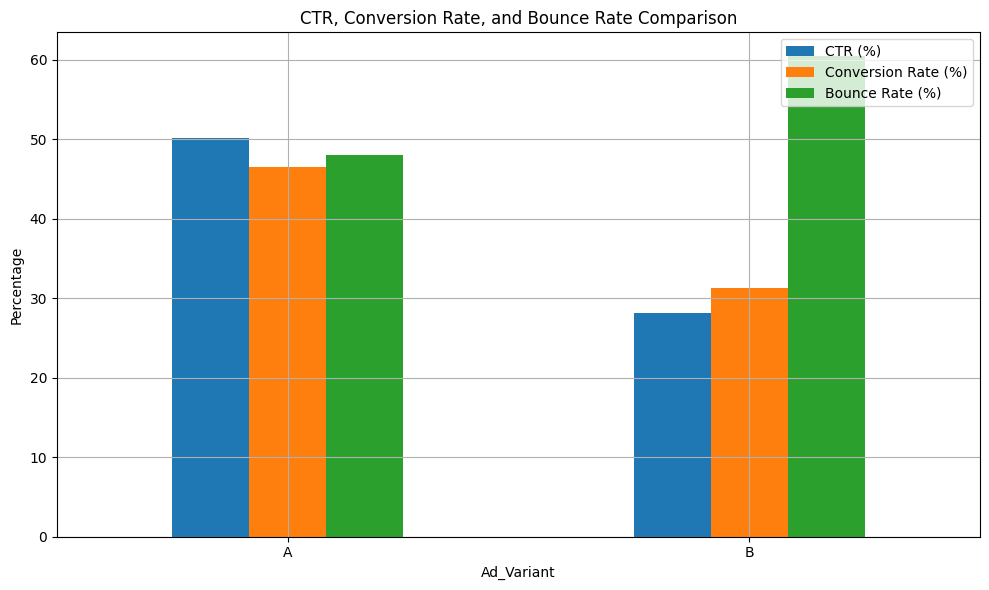

In [ ]:
import matplotlib.pyplot as plt

# Plot comparison bar charts for each metric
metrics_to_plot = ['CTR (%)', 'Conversion Rate (%)', 'Bounce Rate (%)']
grouped_metrics[metrics_to_plot].plot(kind='bar', figsize=(10,6))
plt.title('CTR, Conversion Rate, and Bounce Rate Comparison')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

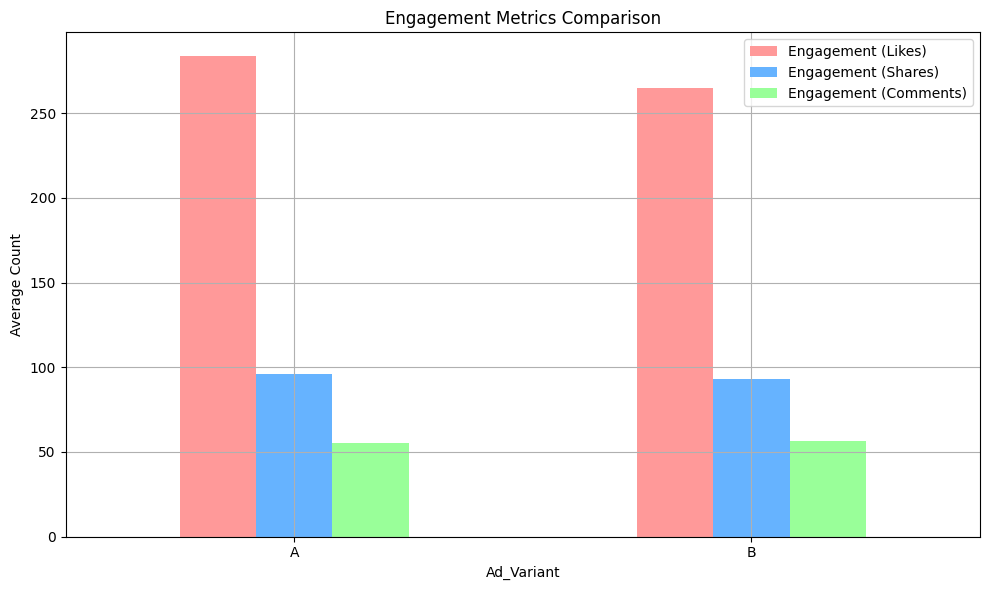

In [ ]:
# Engagement Metrics
engagement_cols = ['Engagement (Likes)', 'Engagement (Shares)', 'Engagement (Comments)']
grouped_metrics[engagement_cols].plot(kind='bar', figsize=(10,6), color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Engagement Metrics Comparison')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Questions and Answers**

Q1)    Which ad has a higher CTR (%)? What does this indicate?

Ans)  Ad A has higher CTR. which means it affects the emotion of the viewer and pushes them to further know about the product/service from the website. hence they click through the bait.

Q2) Which ad has a higher conversion rate (%)? Why is this important?

Ans) Ad A has a higher conversion rate. The product/service either intruiges them or impresses them so much that they want to purchase it immidiately, register on the platform to be updated about it later, browse through the other options etc. OR the UI and product display is so fantastically done to leave an impression. This Ad maybe performs its purpose and really speaks th what the sellers wanted to convey to the buyers(communication)

Q3)  What does the bounce rate (%) tell us about user behavior?

Ans) Bounce rate tells us that the user is quick with his fingers and scrolls and types fast. He/she has a brief attention span, and we need to captivate them quick and strong with a creative message in any format.
If the CTR is high and Bounce rate is high--we know the user entered by mistake to the site. A low bounce rate normally cor-relates with high CTR and slighlty high conversion.

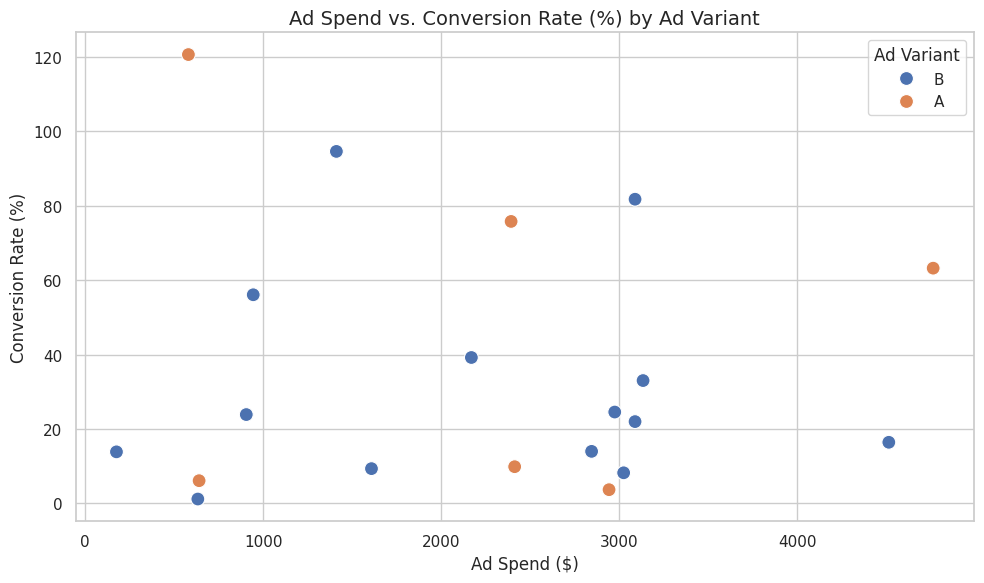

In [ ]:
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Ad Spend ($)', y='Conversion Rate (%)', hue='Ad_Variant', s=100)

# Titles and labels
plt.title('Ad Spend vs. Conversion Rate (%) by Ad Variant', fontsize=14)
plt.xlabel('Ad Spend ($)', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.legend(title='Ad Variant')
plt.tight_layout()
plt.show()


**Questions and Answers**

Q1) 1.Does more ad spend always lead to higher conversions?

**ans)** Not neccessaritly according to the plot and data. Theres seesm to be no solid connection or pattern to prove that statement.So, i think the quality of Ad content tailored to the segment shown it makes a difference.

Q2)Which engagement metric correlates most with conversion success?

**ans)** From the plots I would say "Likes". But for a more detailed view, A cor-relation heatmap needs to be derived.

Q3)Is the difference in CTR (%) between Ad A and Ad B statistically significant?

**ans)** From the plot, 'Yes!'. We can see for A it is "50.12%" and for B its "28.09%", which is not quite close to each other to ignore.

Q4) If one ad performed better, what factors might have contributed to it (design, call-to-action, audience targeting)?

**Ans)** Demographics of audience, quality of Ad content, Resonating power of content over a wide demographic of people, Creativity in making (Colours, txt,pop),storline(if any) in Ad, Targeting of Ad to particular segment.

** Actionable Insights & Recommendations**

Q1) Based on the findings, recommend which ad should be used in future campaigns.

**Ans)** Ad "A", as it ouperforms Ad B in almost all metrics.

Q2) Suggest ways to optimize ad creatives, targeting, or budget allocation.

**Ans)**Analyze demographic and behavioral data to find which audience segments responded best to Ad A. Run retargeting campaigns for users who clicked but didn’t convert.

Use top-performing elements from Ad A in Ad B.A/B test individual creative components like headlines, images, and CTA buttons to identify what resonates most.Include user testimonials or product benefits if we can.

In terms of budget,

Allocate a higher portion of budget to Ad A in the short term since it shows better ROI.Test incremental budget increases to see if Ad A maintains performance at scale.Run smaller budget experiments with modified versions of Ad B before scaling. Constant monitoring will help us scale, make changes and deploy more effective Ads.


Q3)If Ad A performed better, what changes should be made to Ad B to improve it?

**Ans)** Some possible changes that can be made are:

Make the visuals and messaging more engaging—perhaps A's style resonated more. Use stronger or more action-oriented call-to-actions like Ad A.

Refining audience targeting: Ad B might have been shown to a less relevant audience.  Test Ad B during the high-performing time windows of Ad A.
 Leverage layout, tone, color schemes, or engagement hooks from Ad A.


Q4)What additional data would you collect to improve future A/B tests?

**Ans)** Demographic data for people, Ad Placement Data(mobile, laptot etc, most importantly "Time and Date of Engagement",Return on Ad Spend,Scroll depth or time spent on landing page etc.

